## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  颜丙琦
+ 学号  0165199

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [49]:
#请将CEPS.csv数据读入python
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df.dropna()
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2


In [50]:
#请从中随机抽取1000个数据
df1=df.sample(n=1000) 
df1.head()

,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
18466,18467,421,108,27,1,1,3460.576904,1,1,10,...,2,2,1,1,3,2,3,1,1,2
16500,16501,386,99,25,1,1,1556.585815,1,1,6,...,1,2,2,2,3,4,4,1,1,2
1610,1611,43,11,3,1,1,2962.799561,0,1,10,...,2,2,5,2,5,5,5,1,1,2
3178,3179,80,20,5,3,3,201.324326,0,1,14,...,2,1,,,4,5,5,1,2,1
10802,10803,262,68,17,1,1,2041.106812,1,1,13,...,2,2,1,3,3,3,3,1,1,2


In [51]:
#请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
#选取身高、体重 两个变量
sentinels = {'a13': [''], 'a14': ['']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
#计算计算这两个连续变量的均值
mean_shengao=df1['a13'].mean()
mean_tizhong=df1['a14'].mean()
print('身高平均为：%.2f厘米'% mean_shengao)
print('体重平均为：%.2f斤'% mean_tizhong)

身高平均为：161.39厘米
体重平均为：99.17斤


In [53]:
#重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
count=1
mean_shengao=[]
mean_tizhong=[]
for count in range(30):
    df_new=df.sample(n=1000)   
    mean_shengao_new=df_new['a13'].mean()    
    mean_shengao.append(mean_shengao_new)
    mean_tizhong_new=df_new['a14'].mean()    
    mean_tizhong.append(mean_tizhong_new)
    count=count+1
print('身高样本均值:',mean_shengao)
print("体重样本均值:",mean_tizhong)

身高样本均值: [161.4366632337796, 161.92790937178168, 161.13374485596708, 161.59730848861284, 161.34156378600824, 161.67665289256198, 161.1198347107438, 161.18143899895725, 161.42461538461538, 161.32231404958677, 161.79110651499482, 161.73326467559218, 161.29145211122554, 161.32227979274612, 161.47010309278352, 161.00102880658437, 161.54564315352698, 161.32574974146846, 161.73435897435897, 161.6081081081081, 162.0401647785788, 161.30785123966942, 161.51946721311475, 161.568345323741, 161.4002068252327, 161.55104166666666, 161.3866943866944, 161.88410256410256, 161.87825182101977, 161.34571723426214]
体重样本均值: [100.09190371991247, 99.95833333333333, 98.6528384279476, 99.98028477546549, 99.94046306504961, 99.59179265658747, 100.07952069716775, 98.97240618101546, 99.24108108108108, 98.39476553980371, 99.54525627044711, 99.1989010989011, 99.88611713665944, 99.43075245365321, 99.80648648648649, 99.03921568627452, 99.01207464324918, 100.44629014396456, 100.85237068965517, 98.59247311827957, 100.1902

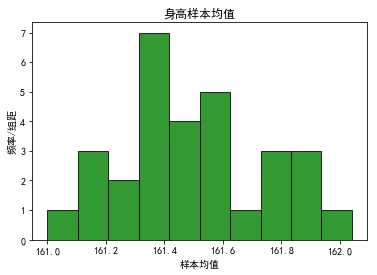

In [54]:
#绘制这30个样本均值的直方图
#身高
plt.subplot()
plt.hist(mean_shengao,bins=10,facecolor='green',edgecolor="black", alpha=0.8)
plt.xlabel("样本均值")
plt.ylabel("频率/组距")
plt.title("身高样本均值")
plt.show()

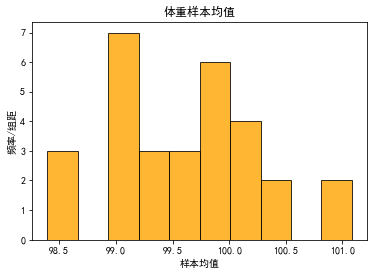

In [55]:
#体重
plt.subplot()
plt.hist(mean_tizhong,bins=10,facecolor='orange',edgecolor="black", alpha=0.8)
plt.xlabel("样本均值")
plt.ylabel("频率/组距")
plt.title("体重样本均值")
plt.show()

In [56]:
#计算均值的均值和标准误
shengao_miu=np.mean(mean_shengao)
tizhong_miu=np.mean(mean_tizhong)
print('平均身高的均值:%.2f'%shengao_miu)
print('平均体重的均值:%.2f'%tizhong_miu)
SE_mean_height=np.var(mean_shengao)
SE_mean_weight=np.var(mean_tizhong)
print('平均身高的标准误:%.4f'%SE_mean_height**0.5)
print('平均体重的标准误:%.4f'%SE_mean_weight**0.5)

平均身高的均值:161.50
平均体重的均值:99.61
平均身高的标准误:0.2521
平均体重的标准误:0.6397


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [65]:
#选择变量
sentinels = {'b30': [' '],'b31': [' '],'b33': [' '],'c25': [' ']}
#b30：父母对孩子学习成绩的要求
#b32：父母对孩子的教育期望
#b33：父母对孩子的理想职业
#c25：孩子的理想职业
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
df.dropna()
df2=df.sample(n=1000)
df2

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
11388,11389,272,71,18,1,1,2340.483154,1,0,13,...,2,2,1,3,3,3,3,1,1,2
17362,17363,401,103,26,1,1,5043.308105,0,1,7,...,1,2,1,3,1,2,2,1,1,2
15963,15964,371,96,24,3,3,290.184937,0,0,14,...,2,1,,,3,7,7,1,2,1
8848,8849,222,58,15,1,1,3280.502197,1,0,8,...,2,2,2,2,2,1,2,1,1,2
11923,11924,282,73,19,1,1,2962.947754,1,1,6,...,1,2,,,3,2,3,1,1,2
18206,18207,416,107,27,1,1,2763.246582,1,0,7,...,1,2,1,1,3,3,3,1,1,2
16207,16208,379,98,25,1,1,1372.369385,1,0,12,...,2,2,1,1,2,2,2,1,1,2
16881,16882,394,101,26,1,1,3199.416504,0,1,1,...,1,1,,,2,2,2,1,2,1
1494,1495,41,11,3,1,1,2550.557861,0,0,14,...,2,1,,,6,6,6,,,2
899,900,28,7,2,3,3,246.888245,0,1,15,...,2,1,,,6,6,6,2,1,1


In [66]:
data = pd.DataFrame({
    'x1':df2.b30,
    'x2':df2.b31,
    'x3':df2.b33,
    'y': df2.c25})
data=data.dropna()
#删除缺失值
data

,x1,x2,x3,y
11388,2.0,5.0,11.0,2.0
17362,4.0,5.0,10.0,3.0
15963,2.0,7.0,1.0,3.0
8848,2.0,7.0,1.0,2.0
11923,2.0,7.0,2.0,4.0
18206,1.0,6.0,4.0,3.0
16207,2.0,6.0,4.0,3.0
16881,2.0,7.0,4.0,1.0
1494,4.0,4.0,4.0,3.0
899,1.0,7.0,3.0,2.0


In [67]:
#构建自变量
model_x= ['x1','x2','x3']
X = data.loc[ :,model_x].values
#构建因变量
y=data['y'].values
X_model = sm.add_constant(X)

In [68]:
#拟合普通最小二乘回归
model = sm.OLS(y, X)    
results = model.fit()

In [69]:
#各变量的系数
results.params  

array([ 0.29329676,  0.34739929,  0.02430058])

In [70]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     4075.
Date:                Sun, 30 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:48:48   Log-Likelihood:                -1251.3
No. Observations:                 965   AIC:                             2509.
Df Residuals:                     962   BIC:                             2523.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2933      0.026     11.184      0.0

1、模型拟合指标：
    决定系数R-squared=0.927>0.9，说明模型的拟合效果较好。
2、模型的显著性检验结果：
    Prob（Omnibus）<0.05，说明该模型的结果是统计显著的。
3、变量的系数：
    x1的系数为：0.2933, 
    x2的系数为：0.3474,  
    x3的系数为：0.0243
    可以得到方程：y=0.2933x1+0.3474x2+0.0243x3
4、各系数的显著性检验结果：
    各变量的t值>2，且p值<0.05，说明这3个变量的效果都是显著的，
    即父母对孩子的学习成绩期望、教育期望和职业期望对孩子的职业期望有显著影响。
5、对模型结果的解释：
    根据我们的经验来讲，父母对孩子的期望对于孩子未来规划是有很大影响的。
    从拟合的结果来看，父母对孩子的学习成绩期望、教育期望和职业期望对孩子的职业期望有很大的影响，当父母的期望值越高的时候，孩子对自己未来的
    职业规划目标更高。其中教育期望的相关程度最高，职业期望的相关程度最低，未来职业的选择与孩子的爱好和性格有很大关系，与父母的意愿的相关程
    度会相对其他指标更低一些。    